# Simon's Algorithm

In [1]:
import qiskit
import numpy as np # define random numbers
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import circuit_drawer, plot_bloch_multivector, plot_histogram
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import random_statevector
#from qiskit.extensions import initialize
from math import pi, sqrt
import pylatexenc
from pylatexenc.latex2text import LatexNodes2Text

In [12]:
s = '10' # secret string

input_qubits = len(str(s))

total_qubits = 2*input_qubits

qc= QuantumCircuit(total_qubits, input_qubits) # we only measure the first register

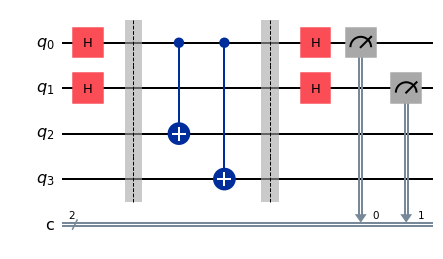

In [13]:
#apply hadamard to the first register
qc.h(range(input_qubits))
qc.barrier()

#define the oracle
for idx in range(input_qubits):
    if (s[idx] == '1'):
        for count in range(input_qubits):
            qc.cx(idx, input_qubits + count)
            
qc.barrier()
# apply hadamard again
qc.h(range(len(str(s))))

#only measure the first qubit
qc.measure([0,1], [0,1])

qc.draw('mpl')

# QASM Simulator


 Total counts are: {'01': 512, '00': 488}


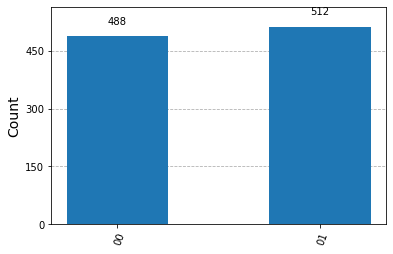

In [14]:
backend = Aer.get_backend('qasm_simulator')

simon_algo = transpile (qc, backend)

job = backend.run(simon_algo, shots = 1000)

result = job.result()

counts = result.get_counts(qc)

print("\n Total counts are:", counts)

plot_histogram(counts)

In [15]:
# this is a 2-2 function and 01 is the little endian order which is 10
# change secret string s like 00, 01, ... to see their differences